In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

# Load MNIST data from openml
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Scale pixel values to [0, 1]
y = np.array(mnist.target, dtype=int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create MLPClassifier model with desired hyperparameters
model = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=300, verbose=True)

# Train the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(accuracy * 100))


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.41504881
Iteration 2, loss = 0.19193191
Iteration 3, loss = 0.14142684
Iteration 4, loss = 0.11129416
Iteration 5, loss = 0.09116867
Iteration 6, loss = 0.07588034
Iteration 7, loss = 0.06499489
Iteration 8, loss = 0.05534105
Iteration 9, loss = 0.04905975
Iteration 10, loss = 0.04165338
Iteration 11, loss = 0.03618041
Iteration 12, loss = 0.03143042
Iteration 13, loss = 0.02732516
Iteration 14, loss = 0.02388871
Iteration 15, loss = 0.02092703
Iteration 16, loss = 0.01824475
Iteration 17, loss = 0.01582823
Iteration 18, loss = 0.01392497
Iteration 19, loss = 0.01216290
Iteration 20, loss = 0.01082202
Iteration 21, loss = 0.00991792
Iteration 22, loss = 0.00871280
Iteration 23, loss = 0.00688652
Iteration 24, loss = 0.00599686
Iteration 25, loss = 0.00558564
Iteration 26, loss = 0.00487059
Iteration 27, loss = 0.00454138
Iteration 28, loss = 0.00370182
Iteration 29, loss = 0.00346548
Iteration 30, loss = 0.00289051
Iteration 31, loss = 0.00239208
Iteration 32, los

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess input images
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255.0

# Define model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


11490434/11490434 [==============================] - 2s 0us/step
Epoch 1/5
938/938 [==============================] - 8s 4ms/step - loss: 0.1820 - accuracy: 0.9458
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0519 - accuracy: 0.9836
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0374 - accuracy: 0.9889
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0276 - accuracy: 0.9909
Epoch 5/5
938/938 [==============================] - 4s 5ms/step - loss: 0.0222 - accuracy: 0.9930
313/313 - 1s - loss: 0.0278 - accuracy: 0.9913 - 967ms/epoch - 3ms/step
Test accuracy: 0.9912999868392944


[1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039]
1/1 [==============================] - 0s 89ms/step


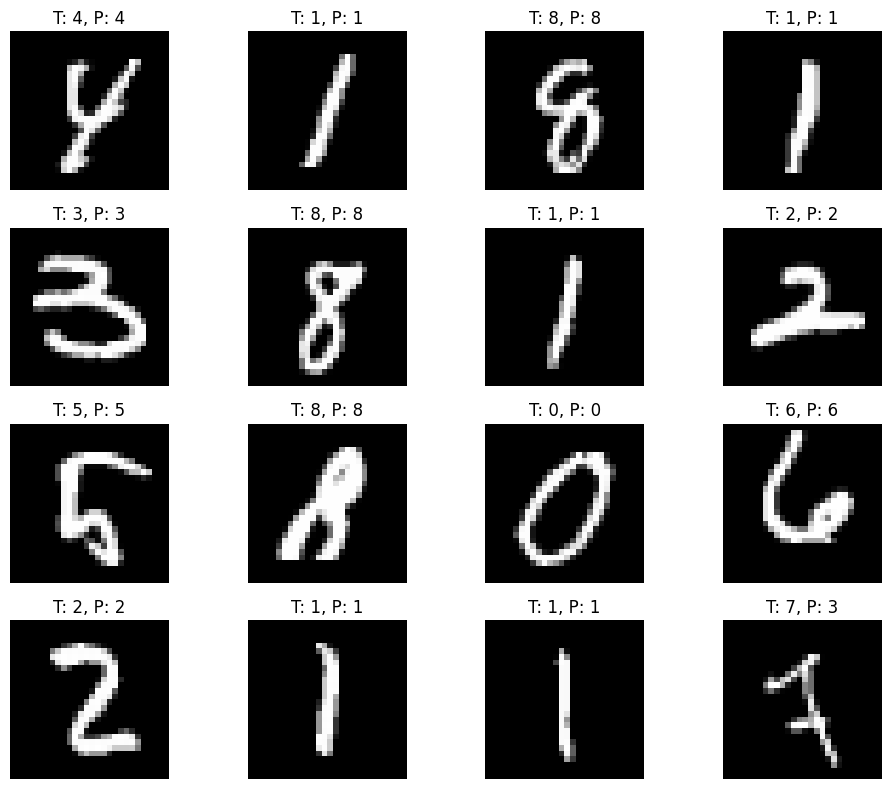

In [3]:
# Get 16 random indices for the test set
#indices = np.random.choice(len(test_images), size=16, replace=False)
#indices = np.where(np.random.rand(len(test_images)) < 0.025)[0]
indices = [1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039]
print(indices)
# Make predictions on the test set
y_pred_logits = model.predict(test_images[indices])
y_pred = np.argmax(y_pred_logits, axis=-1)

# Create a figure with 16 subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 8))

# For each subplot, plot the corresponding image and write the true and predicted labels on top
for i, ax in enumerate(axs.flatten()):
    if i < len(indices):
        img_index = indices[i]
        ax.imshow(test_images[img_index], cmap='gray')
        ax.set_title(f'T: {test_labels[img_index]}, P: {y_pred[i]}', fontsize=12)
        ax.axis('off')

#for i, ax in zip(indices, axs.flatten()):
#    ax.imshow(test_images[i], cmap='gray')
    #ax.set_title(f'True: {test_labels[i]}, Pred: {y_pred[i]}', fontsize=12)
#    ax.set_title(f'T {test_labels[i]}, P {y_pred[i]}', fontsize=12)
#    ax.axis('off')

plt.tight_layout()
plt.show()
